In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report,accuracy_score
df=pd.read_csv(r"C:\Users\Nimisha\Desktop\heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Finding number of Rows and Columns
df.shape

(918, 12)

In [4]:
#Finding Number of Elements
df.size

11016

In [5]:
#Gives Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Giving Statistical Summary 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#Data Cleaning
#Checking for Missing Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Checking for Duplicate Values
df[df.duplicated()==True]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


C:\Users\Nimisha\AppData\Local\Temp\ipykernel_7360\1357824454.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

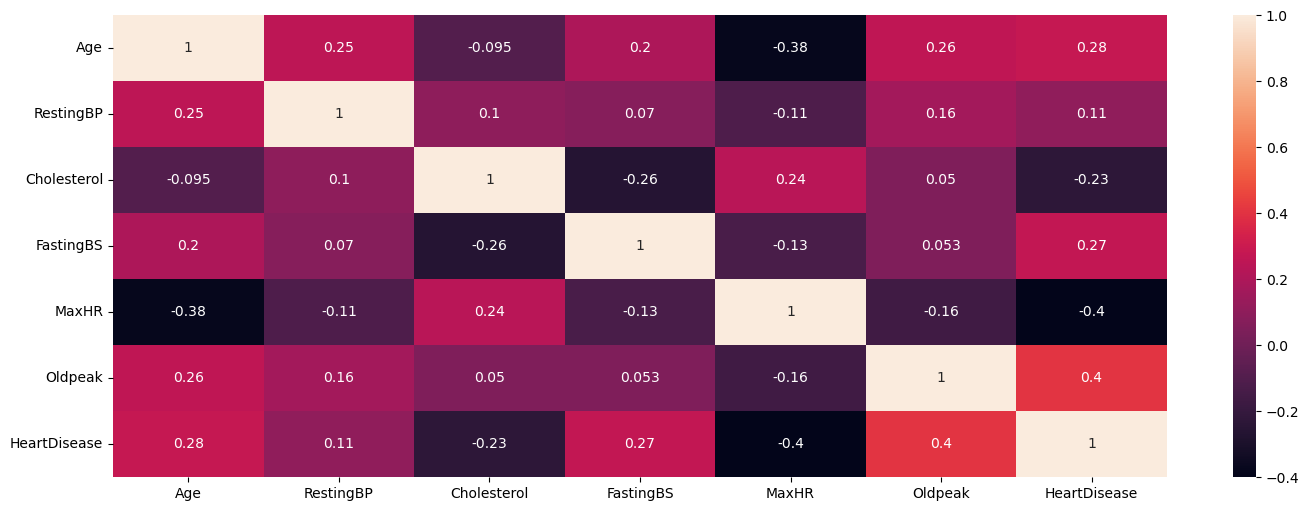

In [9]:
#Plotting HeatMap
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [10]:
#Printing Column Names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x400 with 0 Axes>

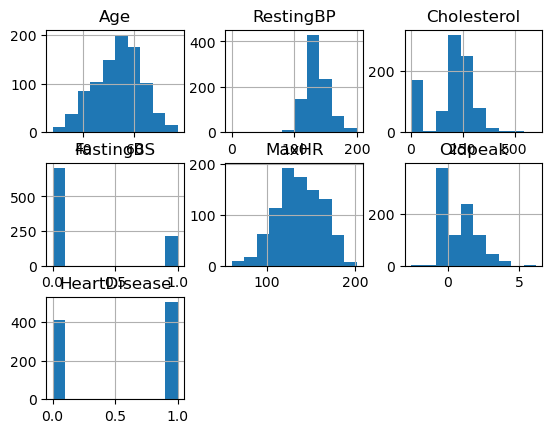

In [11]:
plt.figure(figsize=(15,4))
df.hist()

In [13]:
#No. of people having heart disease
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

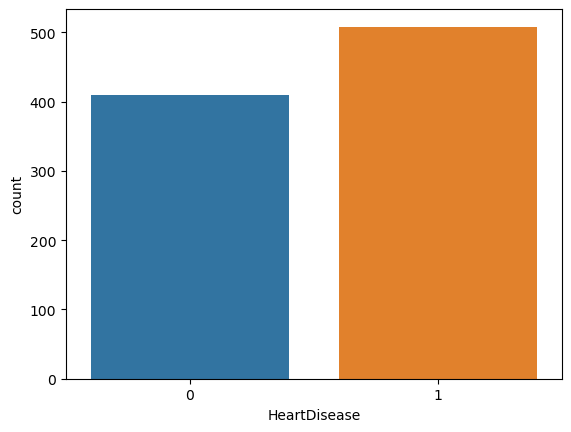

In [14]:
#Plotting it using Countplot
sns.countplot(x='HeartDisease',data=df)

In [15]:
#Gender Distribution
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

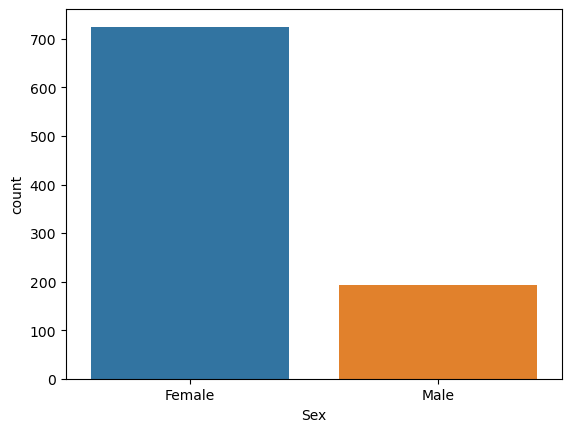

In [16]:
#Plotting it using Countplot
sns.countplot(x='Sex',data=df)
plt.xticks([0,1],['Female','Male'])
plt.show()

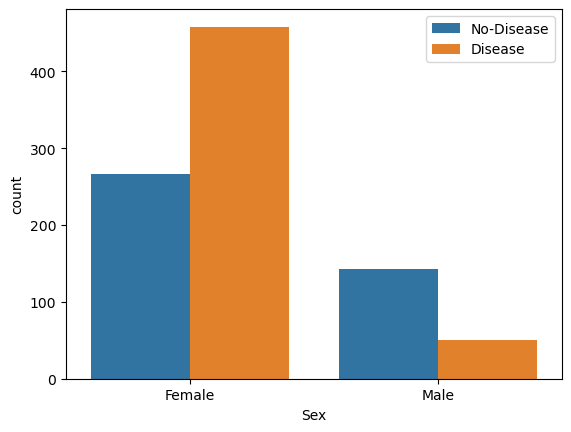

In [17]:
#Sex vs HeartDisease Distribution
sns.countplot(x='Sex',hue='HeartDisease',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

C:\Users\Nimisha\AppData\Local\Temp\ipykernel_13844\1248175900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=30)


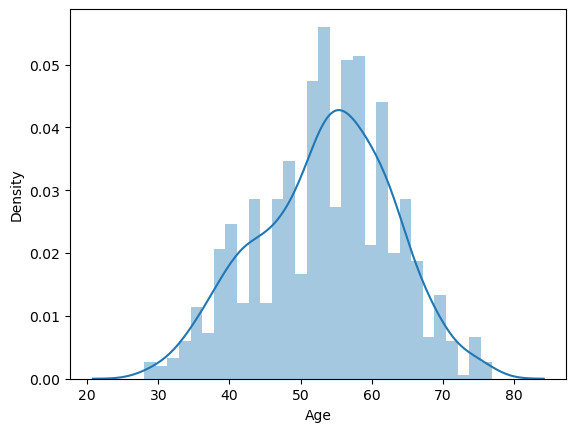

In [18]:
#Age Distribution
sns.distplot(df['Age'],bins=30)
plt.show()

In [19]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


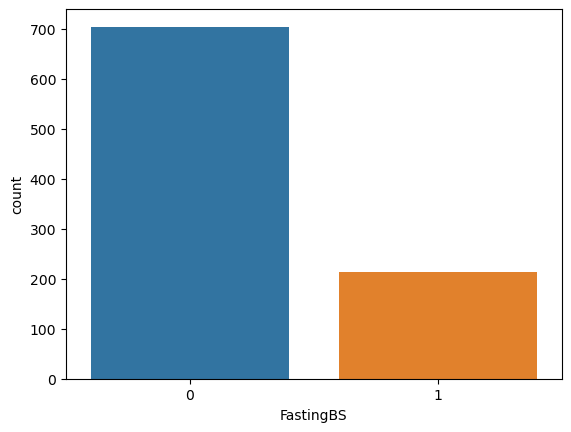

In [20]:
#FastingBS Distribution
sns.countplot(x='FastingBS',data=df)
plt.show()

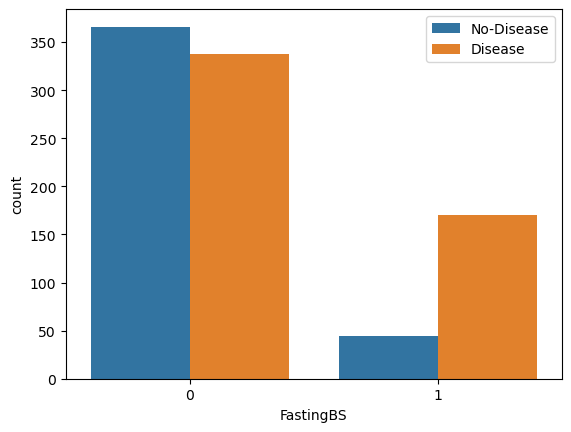

In [21]:
#FastingBS Vs HeartDisease Distribution
sns.countplot(x='FastingBS',hue='HeartDisease',data=df)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

<Axes: >

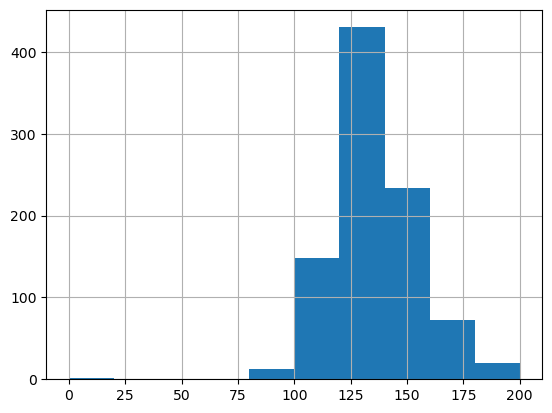

In [22]:
#RestingBP Distribution
df['RestingBP'].hist()

C:\Users\Nimisha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nimisha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


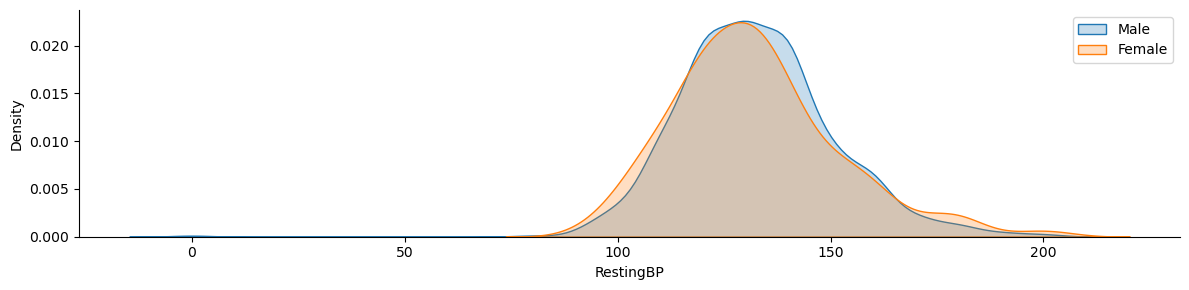

In [23]:
#Resting Blood Pressure Distribution VS Sex
g=sns.FacetGrid(df,hue='Sex',aspect=4)
g.map(sns.kdeplot,'RestingBP',shade=True)
plt.legend(labels=['Male','Female'])
plt.show()

<Axes: >

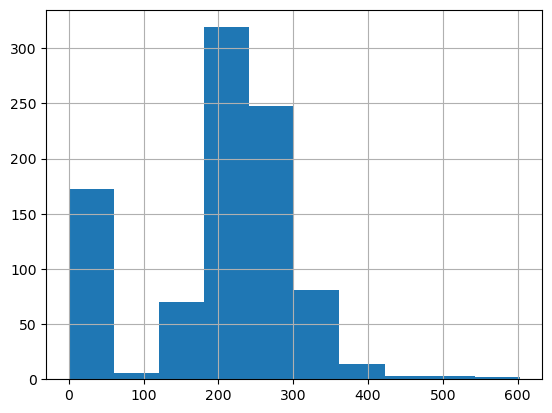

In [24]:
#Serum Distribution
df['Cholesterol'].hist()

In [25]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


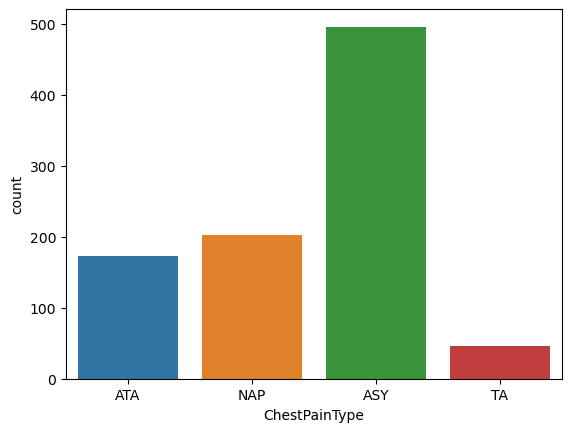

In [26]:
#Chest Pain Distribution
sns.countplot(x ='ChestPainType', data = df)
plt.show()

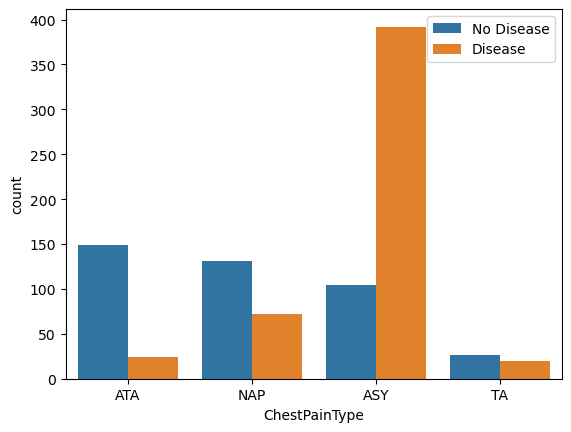

In [27]:
#Chest Pain vs Heart Disease Distribution
sns.countplot(x='ChestPainType',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

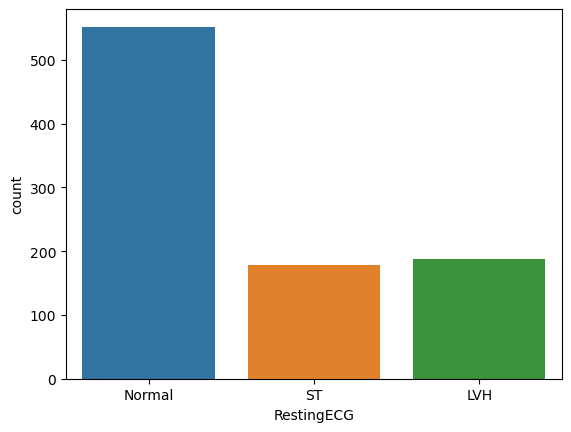

In [28]:
#Resting ECG Distribution
sns.countplot(x ='RestingECG', data = df)
plt.show()

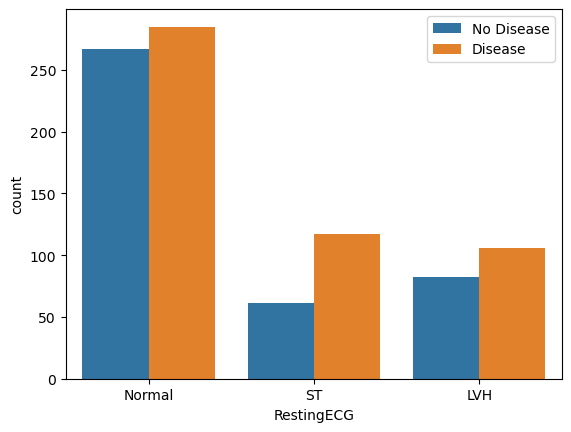

In [29]:
#Resting ECG VS Heart Disease Distribution
sns.countplot(x='RestingECG',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

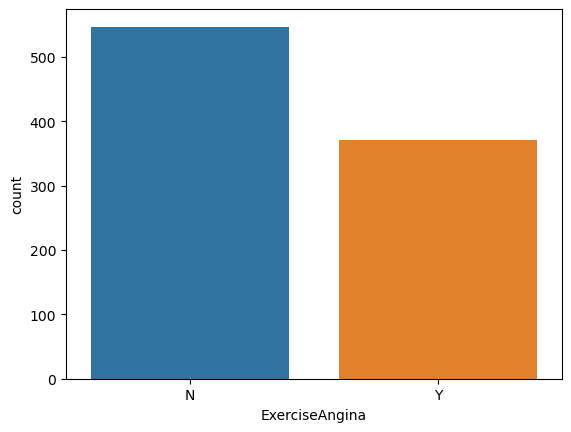

In [30]:
#Excercise Angina Distribution
sns.countplot(x ='ExerciseAngina', data = df)
plt.show()

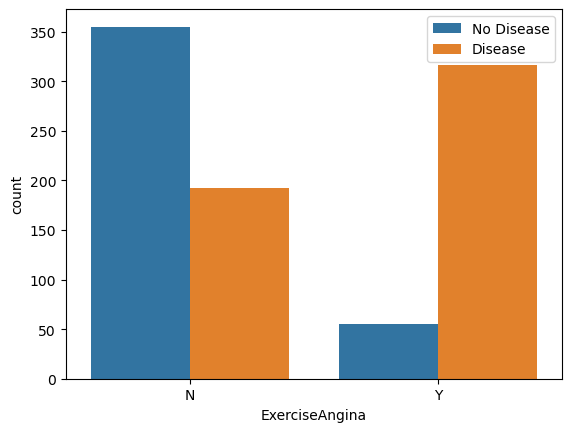

In [31]:
#ExcerciseAngina Vs Heart Disease Distribution
sns.countplot(x='ExerciseAngina',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

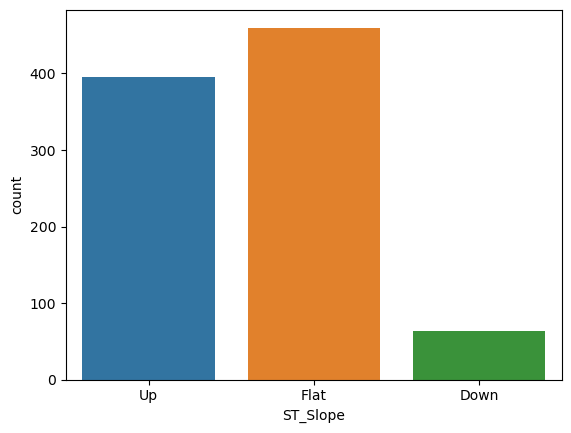

In [32]:
#ST Slope Distribution
sns.countplot(x ='ST_Slope', data = df)
plt.show()

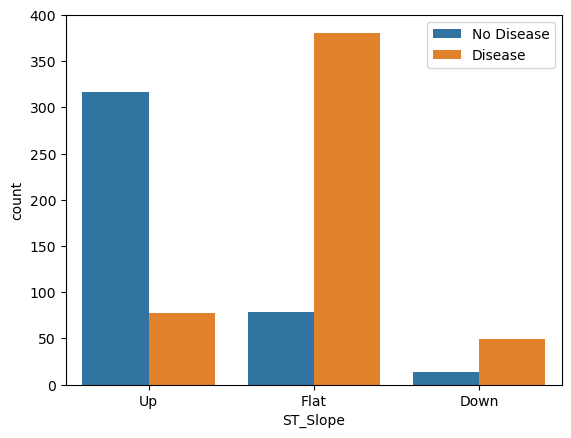

In [33]:
#ST Slope Vs HeartDisease Distribution
sns.countplot(x='ST_Slope',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

In [34]:
#Displaying first 2 rows
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [35]:
#Modelling
#Multiple Linear Regression
#Perform one-hot encoding to convert categorical features to numeric
df=pd.get_dummies(df,columns=['Sex','ChestPainType','RestingBP','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)

In [36]:
#Predcting X and Y values
x=df.drop(columns="HeartDisease",axis=1)
x

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingBP_80,...,RestingBP_180,RestingBP_185,RestingBP_190,RestingBP_192,RestingBP_200,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,172,0.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,49,180,0,156,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,37,283,0,98,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,48,214,0,108,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,54,195,0,122,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,264,0,132,1.2,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
914,68,193,1,141,3.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
915,57,131,0,115,1.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
916,57,236,0,174,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
y=df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [38]:
#Dividing into Training and Testing Sets
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=100)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(642, 80)
(276, 80)
(642,)
(276,)


In [44]:
#Building the Model
l=LinearRegression()
m=l.fit(x_train,y_train)

In [45]:
#Chceking Score
l.score(x,y)

0.520623035501161

In [46]:
#Checking intercept and coefficient
l.intercept_

0.5725539546472886

In [47]:
l.coef_

array([ 4.20504328e-03, -5.56242628e-04,  1.93622581e-01, -1.69614462e-03,
        6.76298137e-02,  2.16796397e-01, -2.03878305e-01, -1.64111002e-01,
       -1.06588807e-01,  6.47426557e-13,  3.27353800e-02, -3.21047279e-01,
       -6.53983812e-13,  2.35020337e-13,  8.73884298e-14, -2.04001750e-01,
        5.98965322e-14, -3.20923843e-14, -1.71747094e-01,  1.91231735e-01,
        1.15185639e-15,  6.15392404e-02,  9.94903445e-02,  1.15027850e-01,
        1.99873704e-01,  1.63374864e-01,  2.38737115e-02,  2.79944435e-01,
        2.77555756e-16,  4.14508206e-01,  3.51444479e-02, -3.37045570e-02,
       -7.14625917e-02,  1.62422917e-01, -4.92042303e-02,  2.09506113e-01,
       -2.18575158e-16,  2.31027701e-02, -1.34311655e-01,  6.17507930e-03,
       -3.16764181e-01, -8.38773623e-02, -2.62316220e-02, -1.42638670e-01,
       -5.53365911e-02, -8.42715013e-02,  3.07897521e-01, -2.69081903e-01,
       -1.13506536e-01, -9.76339646e-02,  8.32667268e-17, -5.18677265e-02,
       -1.20533976e-01,  

In [48]:
#Predicting Value Test Dataset
y_pred_test=m.predict(x_test)
y_pred_test

array([-1.01500660e-01,  2.23380070e-01,  9.31723954e-01,  7.25878734e-01,
        1.56739351e-01,  9.41535593e-01,  9.90960196e-01,  8.79158778e-01,
        1.05386381e+00,  5.42398802e-01,  1.02524747e+00,  8.97509584e-01,
        9.49576888e-01,  5.84052306e-01,  7.31855193e-04,  1.00642321e+00,
        6.11023188e-01,  1.16552826e+00, -7.78292468e-03,  1.04041054e+00,
        1.20000990e+00,  2.54070982e-01,  4.45951164e-01,  1.18660588e+00,
        3.55061800e-01,  2.79054570e-01,  3.87573068e-01,  8.22037741e-01,
        6.40016342e-01,  2.64959117e-01,  3.59637169e-02,  3.44062917e-01,
        2.10558672e-01,  4.73274616e-01,  1.12770299e+00,  3.81187053e-01,
        2.67112945e-02,  5.97828799e-01,  7.38858632e-01,  1.08352301e+00,
        3.02607823e-01, -1.97514011e-01,  7.61307973e-01,  1.01809028e+00,
        8.66888815e-01,  9.36842089e-01,  7.60566002e-01,  6.60561380e-01,
        5.31425706e-01, -8.84231512e-04,  3.35853394e-01,  5.33102136e-01,
        1.01565283e+00,  

In [49]:
y_pred_train=m.predict(x_train)
y_pred_train

array([ 1.12124279e+00,  8.71236281e-01,  3.52354002e-01,  2.22135297e-02,
        1.06350327e+00,  2.71278085e-01,  4.14968524e-01,  8.90656031e-01,
        8.87575449e-01,  3.27759762e-01,  1.94835537e-01,  1.18922088e+00,
        5.52235034e-01,  8.02868672e-01,  9.95165636e-01, -6.85816969e-02,
        9.13473516e-01,  9.41752261e-01,  9.38887646e-01,  1.17454950e+00,
        1.55773561e-01, -5.28029751e-02,  4.66811768e-02,  4.78506124e-14,
        1.61230877e-01,  5.99570811e-01, -5.10142800e-03,  5.67258826e-02,
        3.24442747e-02,  1.30271307e-01,  9.34991496e-01,  7.04627355e-01,
        2.58675090e-01,  6.87999134e-01,  1.12789025e+00,  7.74117090e-01,
        1.09647518e+00,  6.38798525e-01,  2.00829576e-01,  6.46844945e-01,
        9.50336666e-01,  1.17537847e+00,  9.83646961e-01,  2.68673972e-14,
        9.20966318e-01,  7.13397487e-01,  4.46557708e-01,  6.17871066e-01,
        1.49191860e-01,  2.34464427e-01,  5.99435161e-01,  9.97465687e-02,
        8.50808140e-01,  

In [50]:
#Calculating r2 score
r2_score(y_test,y_pred_test)

0.4670402632370755

In [51]:
r2_score(y_train,y_pred_train)

0.6455656496150751

In [52]:
#Checking Mean Absolute Error
mean_absolute_error(y_test,y_pred_test)

0.2722480970832826

In [53]:
mean_absolute_error(y_train,y_pred_train)

0.2226205853454725

In [54]:
#Chceking Mean Squared Error
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.2956644413267327

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.3630864545459752

C:\Users\Nimisha\AppData\Local\Temp\ipykernel_13144\2308415586.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c="green",lw=4)


Text(0, 0.5, 'Predicted')

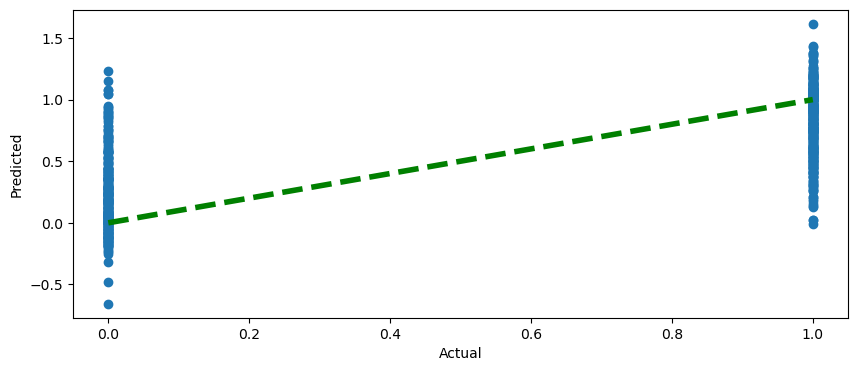

In [56]:
#Plotting Test Data
plt.figure(figsize=(10,4))
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c="green",lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")

C:\Users\Nimisha\AppData\Local\Temp\ipykernel_13144\4100288967.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c="green",lw=4)


Text(0, 0.5, 'Predicted')

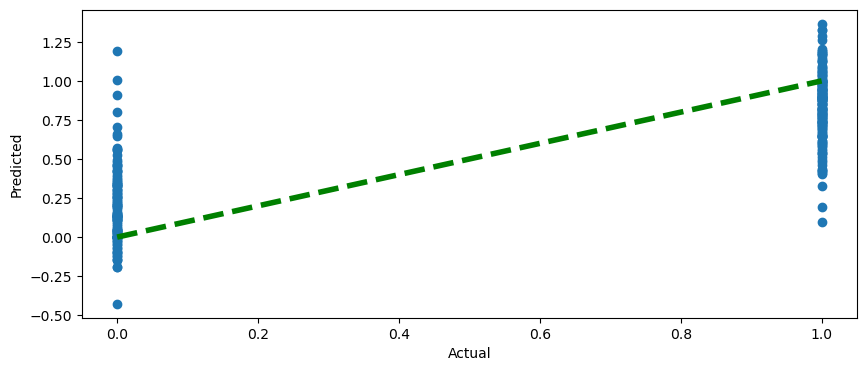

In [57]:
#Plotting Train Data
plt.figure(figsize=(10,4))
plt.scatter(y_train,y_pred_train)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c="green",lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [58]:
#Logistic Regression
df.head(2)

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingBP_180,RestingBP_185,RestingBP_190,RestingBP_192,RestingBP_200,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,172,0.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,49,180,0,156,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [59]:
#Predcting X and Y values
x=df.drop(columns="HeartDisease")
x

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingBP_80,...,RestingBP_180,RestingBP_185,RestingBP_190,RestingBP_192,RestingBP_200,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,172,0.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,49,180,0,156,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,37,283,0,98,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,48,214,0,108,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,54,195,0,122,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,264,0,132,1.2,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
914,68,193,1,141,3.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
915,57,131,0,115,1.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
916,57,236,0,174,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
y=df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [61]:
#Dividing into Training and Testing Sets
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=100)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(642, 80)
(276, 80)
(642,)
(276,)


In [62]:
#Building the Model
a=LogisticRegression()

In [63]:
b=a.fit(x_train,y_train)

C:\Users\Nimisha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
y_pred_tested=b.predict(x_test)
y_pred_tested

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [65]:
y_pred_trained=b.predict(x_train)
y_pred_trained

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [66]:
#Testing
#Print Confusion Matrix

In [67]:
pd.DataFrame(confusion_matrix(y_test,y_pred_tested),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,227,61
Actual Yes,42,312


In [68]:
pd.DataFrame(confusion_matrix(y_train,y_pred_trained),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,107,15
Actual Yes,14,140


In [69]:
#Print Classification Report
#Test Data
print(classification_report(y_test,y_pred_tested))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       288
           1       0.84      0.88      0.86       354

    accuracy                           0.84       642
   macro avg       0.84      0.83      0.84       642
weighted avg       0.84      0.84      0.84       642



In [70]:
#Train Data
print(classification_report(y_train,y_pred_trained))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       122
           1       0.90      0.91      0.91       154

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [71]:
#Random Forest Classifier
#Predcting X and Y values
x=df.drop(columns="HeartDisease")
x

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingBP_80,...,RestingBP_180,RestingBP_185,RestingBP_190,RestingBP_192,RestingBP_200,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,289,0,172,0.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,49,180,0,156,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,37,283,0,98,0.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,48,214,0,108,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,54,195,0,122,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,264,0,132,1.2,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
914,68,193,1,141,3.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
915,57,131,0,115,1.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
916,57,236,0,174,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
y=df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [73]:
#Dividing into Training and Testing Sets
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=100)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(642, 80)
(276, 80)
(642,)
(276,)


In [74]:
#Building The model

In [75]:
p=RandomForestClassifier(n_estimators=100, random_state=100).fit(x_train,y_train)

In [77]:
#Predicting Test and Train Values
y_pred_testing=p.predict(x_test)
y_pred_testing

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [78]:
y_pred_training=p.predict(x_train)
y_pred_training

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [73]:
#Checking for ACcuracy Score
#Checeking for Test Data
y_pred_test_acc=accuracy_score(y_test,y_pred_testing)
y_pred_test_acc

0.8551401869158879

In [74]:
#Chceking for Train Data
y_pred_train_acc=accuracy_score(y_train,y_pred_training)
y_pred_train_acc

1.0

In [75]:
#Printing Classification Report
#Test Data
print(classification_report(y_test,y_pred_testing))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       288
           1       0.85      0.89      0.87       354

    accuracy                           0.86       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.86      0.85       642



In [76]:
#Train Data
print(classification_report(y_train,y_pred_training))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       154

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

